In [1]:
import pandas as pd
import numpy as np
import fpw

In [2]:
#Pull data
df = pd.read_csv("/data/sams_datasets/tydy.csv", header=None)
t = df[0].values
y = df[1].values
dy = df[2].values

ivar = 1/dy**2

#Pull the fgrid
df = pd.read_csv("/data/sams_datasets/fgrid.csv", header=None)
fgrid = df[0].values

In [3]:
%%time

#Run fpw on this data
pgram = fpw.run_fpw(t, y, ivar, fgrid, 10)

CPU times: user 11 s, sys: 148 ms, total: 11.1 s
Wall time: 11 s


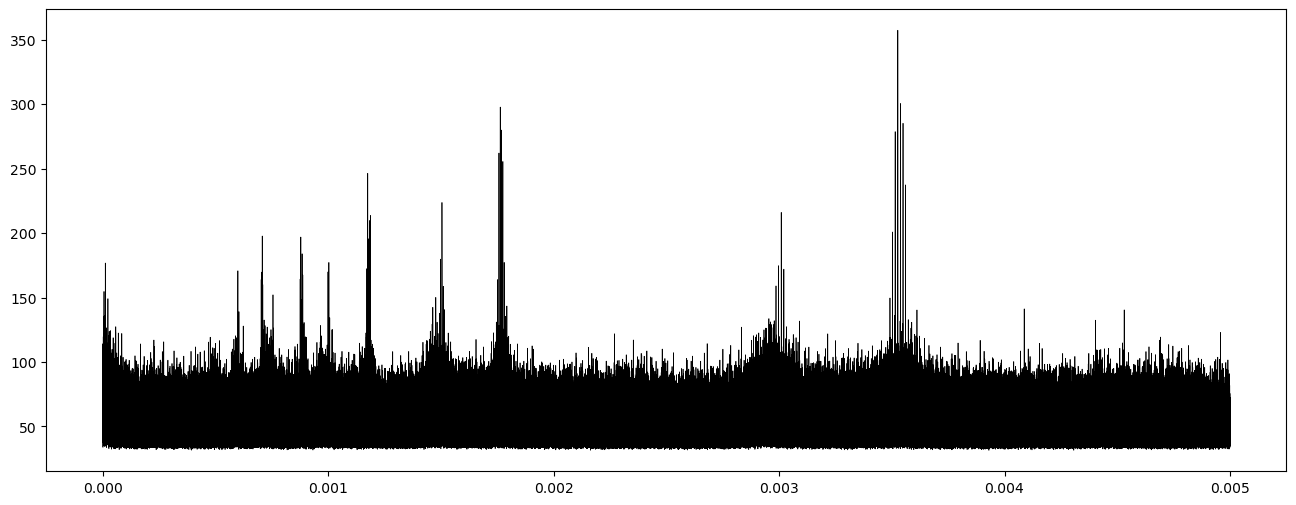

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.plot(fgrid, pgram, color='black', lw=0.5)
plt.show()

In [9]:
#Make a randomly sampled signal of 1000 values
t = np.random.uniform(0, 100, 1000)
#Make the signal gaussian white noise with mean 0 variance 1
y = np.random.normal(0, 1, 1000)
#Make ivar
ivar = np.ones(1000)

#Create a frequency grid
fgrid = np.linspace(1e-5, 1, int(1e6))

#Run fpw on this data
pgram = fpw.run_fpw(t, y, ivar, fgrid, 10)

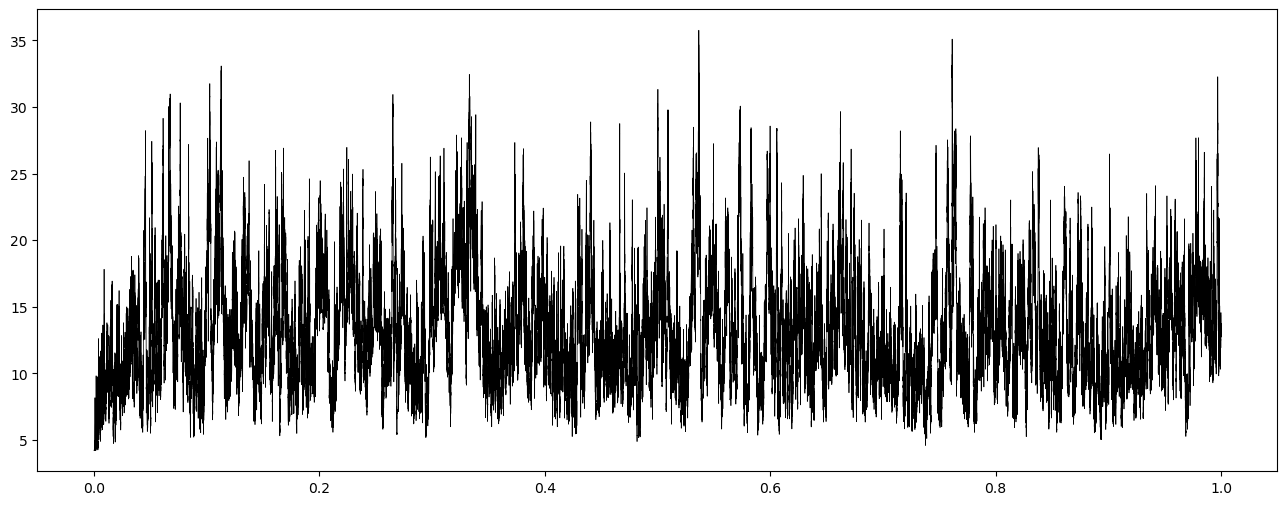

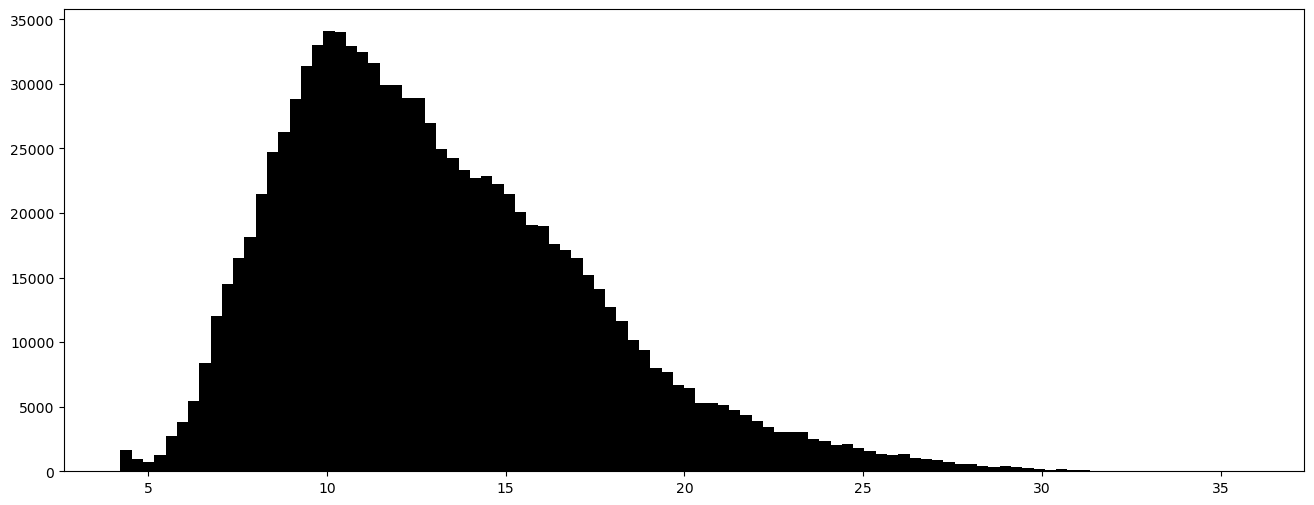

In [11]:
#Plot the periodogram and the underlying distribution
plt.figure(figsize=(16, 6))
plt.plot(fgrid, pgram, color='black', lw=0.5)
plt.show()

#Plot the distribution of power
plt.figure(figsize=(16, 6))
plt.hist(pgram, bins=100, color='black')
plt.show()